# Assignment 2: Simple Implementation of VGG and ResNet Models with CIFAR-10 Dataset
#### In Assignment 2, you will implement two representative CNN architectures (VGG and ResNet) in a simplified form. You will then train and perform inference using the CIFAR-10 dataset.

## Case 1) VGG16 Model Implementation
- [doc] (https://arxiv.org/pdf/1409.1556.pdf)

![image.png](http://drive.google.com/uc?id=1E6MVIcFCsImwWQGOhC-8KUQqAe2W_I28)

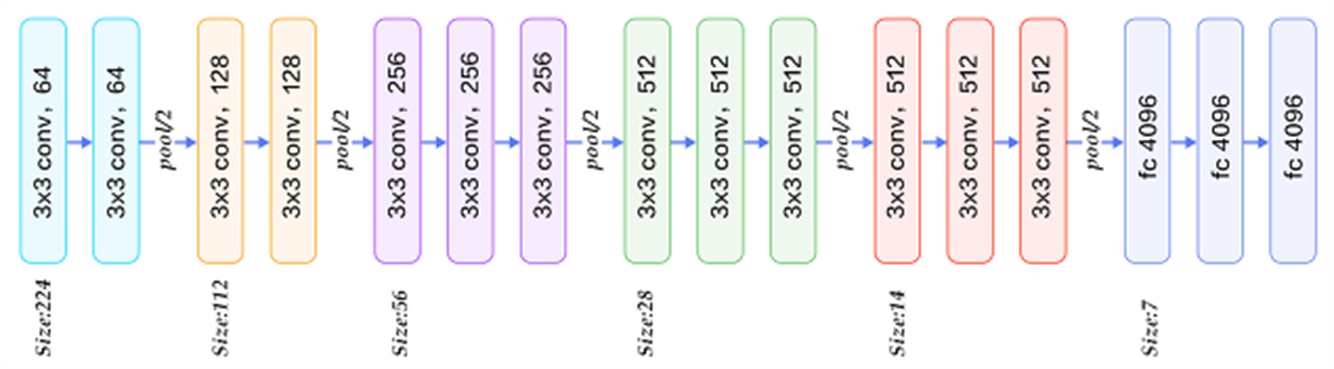


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets, utils
from torchsummary import summary
import matplotlib.pyplot as plt

# DEVICE Setting
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

# Parameter Setting
EPOCHS = 10
BATCH_SIZE = 64
LR = 0.0001

# Transform Setting
transform_CIFAR10 = transforms.Compose([
    # transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

# Dataset Setting
train_dataset = datasets.CIFAR10(root = '../data',
                                         train = True,
                                         download = True,
                                         transform = transform_CIFAR10)

test_dataset = datasets.CIFAR10(root = '../data',
                                train = False,
                                download = True,
                                transform = transform_CIFAR10)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle=True)

In [ ]:
# Model Implementation
class Custom_VGG(nn.Module):
    def __init__(self):
        super(Custom_VGG, self).__init__()
        ########################################## Complete This Code~!

        ########################################## Complete This Code~!

    def forward(self, x):
        ########################################## Complete This Code~!

        ########################################## Complete This Code~!
        return x
model = Custom_VGG().to(DEVICE)
summary(model, (3,32,32))

In [ ]:
from torchvision import models
model_import = models.vgg16(pretrained=False, num_classes=10).to(DEVICE)
summary(model_import, (3, 32, 32))

In [ ]:
# Optimizer Setting
optimizer = optim.Adam(model.parameters(), lr=LR)
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [ ]:
# Train Implementation
def train_one_epoch(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

# Evaluation Implementation
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()

            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

for epoch in range(1, EPOCHS + 1):
    train_one_epoch(model, train_loader, optimizer, epoch)
    test_loss, test_accuracy = evaluate(model, test_loader)

    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

## Case 2) RESNET18 Model Implementation
- [doc] (https://arxiv.org/pdf/1512.03385.pdf)

![image.png](http://drive.google.com/uc?id=1GgHATI5PFF8-PlBdGp9vDra2maRqLybl)

![image.png](http://drive.google.com/uc?id=1EYxIKJEI0rwIyW7ZZaFeZgJvol6Jb-XL)

![image.png](http://drive.google.com/uc?id=17DgT11woHwXACEGOfvkVd8pYmxRI7vQl)

![image.png](http://drive.google.com/uc?id=12reHf9xtapZrVBG4LlNbNGa37ZeFfUqk)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets, utils
from torchsummary import summary
import matplotlib.pyplot as plt

# DEVICE Setting
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

# Parameter Setting
EPOCHS = 10
BATCH_SIZE = 64
LR = 0.01

# Transform Setting
transform_CIFAR10 = transforms.Compose([
    # transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

# Dataset Setting
train_dataset = datasets.CIFAR10(root = '../data',
                                         train = True,
                                         download = True,
                                         transform = transform_CIFAR10)

test_dataset = datasets.CIFAR10(root = '../data',
                                train = False,
                                download = True,
                                transform = transform_CIFAR10)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle=True)

In [ ]:
# Model 구현
class Custom_RESNET(nn.Module):
    def __init__(self):
        super(Custom_RESNET, self).__init__()
        self.maxpool2d = nn.MaxPool2d(kernel_size=3, stride=2)
        self.relu = nn.ReLU(inplace=True)

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(num_features=64)

        self.conv2_1 = nn.Conv2d(64,64,3,padding=1)
        self.conv2_2 = nn.Conv2d(64,64,3,padding=1)
        self.conv2_3 = nn.Conv2d(64,64,3,padding=1)
        self.conv2_4 = nn.Conv2d(64,64,3,padding=1)
        self.bn2_1 = nn.BatchNorm2d(num_features=64)
        self.bn2_2 = nn.BatchNorm2d(num_features=64)
        self.bn2_3 = nn.BatchNorm2d(num_features=64)
        self.bn2_4 = nn.BatchNorm2d(num_features=64)

        self.conv3_1 = nn.Conv2d(64,128,3,padding=1, stride=2)
        self.conv3_2 = nn.Conv2d(128,128,3,padding=1)
        self.conv3_3 = nn.Conv2d(128,128,3,padding=1)
        self.conv3_4 = nn.Conv2d(128,128,3,padding=1)
        self.bn3_1 = nn.BatchNorm2d(num_features=128)
        self.bn3_2 = nn.BatchNorm2d(num_features=128)
        self.bn3_3 = nn.BatchNorm2d(num_features=128)
        self.bn3_4 = nn.BatchNorm2d(num_features=128)

        self.conv4_1 = nn.Conv2d(128,256,3,padding=1, stride=2)
        self.conv4_2 = nn.Conv2d(256,256,3,padding=1)
        self.conv4_3 = nn.Conv2d(256,256,3,padding=1)
        self.conv4_4 = nn.Conv2d(256,256,3,padding=1)
        self.bn4_1 = nn.BatchNorm2d(num_features=256)
        self.bn4_2 = nn.BatchNorm2d(num_features=256)
        self.bn4_3 = nn.BatchNorm2d(num_features=256)
        self.bn4_4 = nn.BatchNorm2d(num_features=256)

        self.conv5_1 = nn.Conv2d(256,512,3,padding=1, stride=2)
        self.conv5_2 = nn.Conv2d(512,512,3,padding=1)
        self.conv5_3 = nn.Conv2d(512,512,3,padding=1)
        self.conv5_4 = nn.Conv2d(512,512,3,padding=1)
        self.bn5_1 = nn.BatchNorm2d(num_features=512)
        self.bn5_2 = nn.BatchNorm2d(num_features=512)
        self.bn5_3 = nn.BatchNorm2d(num_features=512)
        self.bn5_4 = nn.BatchNorm2d(num_features=512)

        self.adaptiveavgpool2d = nn.AdaptiveAvgPool2d(1)

        self.fc = nn.Linear(512, 10)

    def forward(self, x):
        ########################################## Complete This Code~!

        ########################################## Complete This Code~!

        x = self.adaptiveavgpool2d(x5_4)
        x = x.view(-1,512)
        x = self.fc(x)
        return x

model = Custom_RESNET().to(DEVICE)
summary(model, (3, 32, 32))

In [ ]:
from torchvision import models
model_import = models.resnet18(pretrained=False, num_classes=10).to(DEVICE)
summary(model_import, (3, 32, 32))

In [ ]:
# Model, Optimizer Setting
optimizer = optim.SGD(model.parameters(), lr=LR, momentum=0.5)

In [ ]:
# Train Implementation
def train_one_epoch(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

# Evaluation Implementation
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()

            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

for epoch in range(1, EPOCHS + 1):
    train_one_epoch(model, train_loader, optimizer, epoch)
    test_loss, test_accuracy = evaluate(model, test_loader)

    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))